In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import ast 
import torch
import matplotlib.patches as mpatches
import matplotlib as mpl

In [2]:
def val_extractor(file_name1):    
    with open(file_name1) as fi:
        for i, line in enumerate(fi):
            if i == 4:
                each_selec = ast.literal_eval(line)     
            
    return each_selec

In [3]:
xlabels = ('64', '128', '256', '384', '512', '640', '768')
x = (1, 2, 3, 4, 5, 6, 7)

# Batch size = 50

[]

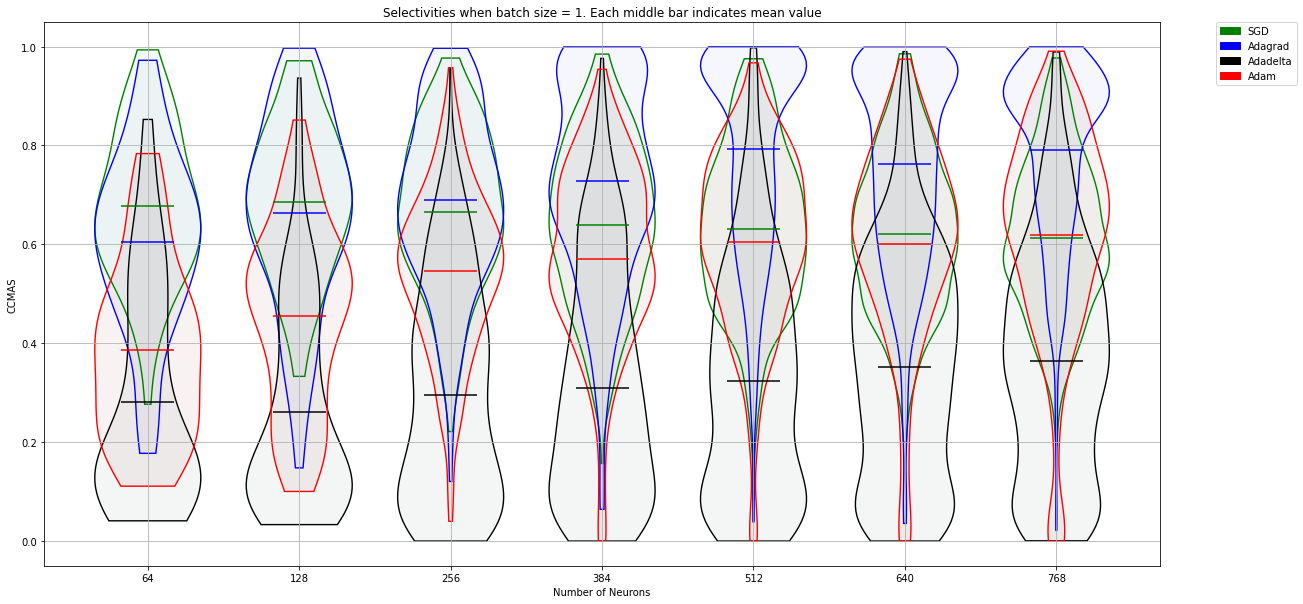

In [4]:
labels = []

############ Adadelta ############
delta64  = val_extractor('batch 1/seed1_batch1_neuronsize64_Adadelta.txt')
delta128 = val_extractor('batch 1/seed1_batch1_neuronsize128_Adadelta.txt')
delta256 = val_extractor('batch 1/seed1_batch1_neuronsize256_Adadelta.txt')
delta384 = val_extractor('batch 1/seed1_batch1_neuronsize384_Adadelta.txt')
delta512 = val_extractor('batch 1/seed1_batch1_neuronsize512_Adadelta.txt')
delta640 = val_extractor('batch 1/seed1_batch1_neuronsize640_Adadelta.txt')
delta768 = val_extractor('batch 1/seed1_batch1_neuronsize768_Adadelta.txt')

############ Adagrad ############
grad64  = val_extractor('batch 1/seed1_batch1_neuronsize64_Adagrad.txt')
grad128 = val_extractor('batch 1/seed1_batch1_neuronsize128_Adagrad.txt')
grad256 = val_extractor('batch 1/seed1_batch1_neuronsize256_Adagrad.txt')
grad384 = val_extractor('batch 1/seed1_batch1_neuronsize384_Adagrad.txt')
grad512 = val_extractor('batch 1/seed1_batch1_neuronsize512_Adagrad.txt')
grad640 = val_extractor('batch 1/seed1_batch1_neuronsize640_Adagrad.txt')
grad768 = val_extractor('batch 1/seed1_batch1_neuronsize768_Adagrad.txt')

############ SGD ############
sgd64  = val_extractor('batch 1/seed1_batch1_neuronsize64_sgd.txt')
sgd128 = val_extractor('batch 1/seed1_batch1_neuronsize128_sgd.txt')
sgd256 = val_extractor('batch 1/seed1_batch1_neuronsize256_sgd.txt')
sgd384 = val_extractor('batch 1/seed1_batch1_neuronsize384_sgd.txt')
sgd512 = val_extractor('batch 1/seed1_batch1_neuronsize512_sgd.txt')
sgd640 = val_extractor('batch 1/seed1_batch1_neuronsize640_sgd.txt')
sgd768 = val_extractor('batch 1/seed1_batch1_neuronsize768_sgd.txt')

############ Adam ############
adam64  = val_extractor('batch 1/seed1_batch1_neuronsize64_adam.txt')
adam128 = val_extractor('batch 1/seed1_batch1_neuronsize128_adam.txt')
adam256 = val_extractor('batch 1/seed1_batch1_neuronsize256_adam.txt')
adam384 = val_extractor('batch 1/seed1_batch1_neuronsize384_adam.txt')
adam512 = val_extractor('batch 1/seed1_batch1_neuronsize512_adam.txt')
adam640 = val_extractor('batch 1/seed1_batch1_neuronsize640_adam.txt')
adam768 = val_extractor('batch 1/seed1_batch1_neuronsize768_adam.txt')

# Accumulate
adadeltas = [delta64, delta128, delta256, delta384, delta512, delta640, delta768]
adagrads = [grad64, grad128, grad256, grad384, grad512, grad640, grad768]
sgds = [sgd64, sgd128, sgd256, sgd384, sgd512, sgd640, sgd768]
adams = [adam64, adam128, adam256, adam384, adam512, adam640, adam768]

# Plot
fig, ax = plt.subplots(figsize=(20, 10))

sgds_vio = ax.violinplot(sgds, showmeans=True, showextrema=False, widths=0.7)
grad_vio = ax.violinplot(adagrads, showmeans=True, showextrema=False, widths=0.7)
delt_vio = ax.violinplot(adadeltas, showmeans=True, showextrema=False, widths=0.7)
adam_vio = ax.violinplot(adams, showmeans=True, showextrema=False, widths=0.7)

# Setting some details

# SGD
for pc in sgds_vio['bodies']:
    
    faceclr = mpl.colors.colorConverter.to_rgba('mediumseagreen', alpha=0.05)
    
    pc.set_facecolor(faceclr)
    pc.set_alpha(0.05)
    
    path = pc.get_paths()[0]
    s = mpl.patches.PathPatch(path, linewidth=1.4, edgecolor='green', fill=False)
    ax.add_patch(s)

sgds_vio['cmeans'].set_facecolor('green')
sgds_vio['cmeans'].set_edgecolor('green')

# ADAGRAD
for pc in grad_vio['bodies']:

    faceclr = mpl.colors.colorConverter.to_rgba('royalblue', alpha=0.05)
    
    pc.set_facecolor(faceclr)
    pc.set_alpha(0.05)
    
    path = pc.get_paths()[0]
    s = mpl.patches.PathPatch(path, linewidth=1.4, edgecolor='blue', fill=False)
    ax.add_patch(s)
    
grad_vio['cmeans'].set_facecolor('blue')
grad_vio['cmeans'].set_edgecolor('blue')

# ADADELTA
for pc in delt_vio['bodies']:

    faceclr = mpl.colors.colorConverter.to_rgba('darkslategray', alpha=0.05)
    
    pc.set_facecolor(faceclr)
    pc.set_alpha(0.05)
    
    path = pc.get_paths()[0]
    s = mpl.patches.PathPatch(path, linewidth=1.4, edgecolor='black', fill=False)
    ax.add_patch(s)
    
delt_vio['cmeans'].set_facecolor('black')
delt_vio['cmeans'].set_edgecolor('black')
    
# ADAM
for pc in adam_vio['bodies']:

    faceclr = mpl.colors.colorConverter.to_rgba('maroon', alpha=0.05)
    
    pc.set_facecolor(faceclr)
    pc.set_alpha(0.05)
    
    path = pc.get_paths()[0]
    s = mpl.patches.PathPatch(path, linewidth=1.4, edgecolor='red', fill=False)
    ax.add_patch(s)
    
adam_vio['cmeans'].set_facecolor('red')
adam_vio['cmeans'].set_edgecolor('red')

# LABELING
labels.append((mpl.patches.Patch(color='green'), 'SGD'))
labels.append((mpl.patches.Patch(color='blue'), 'Adagrad'))
labels.append((mpl.patches.Patch(color='black'), 'Adadelta'))
labels.append((mpl.patches.Patch(color='red'), 'Adam'))

# Additional settings
plt.legend(*zip(*labels), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.grid()
ax.set_title('Selectivities when batch size = 1. Each middle bar indicates mean value')
ax.set_xlabel("Number of Neurons")
ax.set_ylabel("CCMAS")
plt.xticks(x, xlabels)
plt.plot()